In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
file = "//home//vinicius//Data_Science//Notebooks//Kaggle//DataSets//gas-prices-in-brazil//2004-2019.tsv"

In [21]:
df1 = pd.read_table(file)
df1.drop("Unnamed: 0", axis=1,inplace=True)

In [27]:
df1.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## Dados por semana

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null object
DATA FINAL                       106823 non-null object
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO        106823 non-n

## Criar DataFrames separados para os tipos de PRODUTO
**OLEO DIESEL
OLEO DIESEL S10  
GASOLINA COMUM  
GLP  
ETANOL HIDRATADO  
GNV**


In [42]:
df1['PRODUTO'].value_counts()

ÓLEO DIESEL         21194
GASOLINA COMUM      21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

## Começar analise pela Gasolina e Etanol

In [60]:
df_gasolina = df1[df1['PRODUTO'].str.lower()=='gasolina comum']
df_etanol = df1[df1['PRODUTO'].str.lower()=='etanol hidratado']
df_diesel = df1[df1['PRODUTO'].str.lower()=='óleo diesel']

In [61]:
df_gasolina['PRODUTO'].value_counts()

GASOLINA COMUM    21194
Name: PRODUTO, dtype: int64

In [62]:
df_etanol['PRODUTO'].value_counts()

ETANOL HIDRATADO    21102
Name: PRODUTO, dtype: int64

In [63]:
df_diesel['PRODUTO'].value_counts()

ÓLEO DIESEL    21194
Name: PRODUTO, dtype: int64

## Trabalhar sobre o DataFrame df_gasolina

In [64]:
df_gasolina

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
12064,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,GASOLINA COMUM,128,R$/l,2.029,0.007,1.990,2.070,0.318,0.003,1.711,0.02,1.651,1.7427,0.012,5,2004
12065,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,GASOLINA COMUM,395,R$/l,2.025,0.062,1.850,2.220,0.296,0.031,1.729,0.036,1.6643,1.915,0.021,5,2004
12066,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,GASOLINA COMUM,194,R$/l,2.358,0.066,2.000,2.540,0.472,0.028,1.886,0.068,1.75,2.0713,0.036,5,2004
12067,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GASOLINA COMUM,166,R$/l,2.120,0.075,1.970,2.440,0.325,0.035,1.795,0.033,1.70701,1.9703,0.018,5,2004
12068,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GASOLINA COMUM,106,R$/l,2.090,0.034,2.000,2.159,0.35,0.016,1.74,0.042,1.6789,1.918,0.024,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106776,2019-06-23,2019-06-29,NORTE,RORAIMA,GASOLINA COMUM,13,R$/l,4.156,0.010,4.140,4.170,0.444,0.002,3.712,0.06,3.6469,3.825,0.016,6,2019
106777,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GASOLINA COMUM,252,R$/l,4.087,0.173,3.770,4.698,0.303,0.042,3.784,0.083,3.59,3.998,0.022,6,2019
106778,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GASOLINA COMUM,1644,R$/l,4.142,0.183,3.769,4.999,0.429,0.044,3.713,0.097,3.52,4.0892,0.026,6,2019
106779,2019-06-23,2019-06-29,NORDESTE,SERGIPE,GASOLINA COMUM,43,R$/l,4.400,0.102,4.280,4.799,0.346,0.023,4.054,0.04,4.01,4.1483,0.01,6,2019


In [93]:
df_gasolina['REGIÃO'].value_counts()

NORDESTE        7065
NORTE           5494
CENTRO OESTE    3140
SUDESTE         3140
SUL             2355
Name: REGIÃO, dtype: int64

In [94]:
gas_group = df_gasolina.groupby(['ANO','REGIÃO']).mean()

In [95]:
gas_group

NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
ANO  REGIÃO                                                            
2004 CENTRO OESTE                    223.375000             2.288507   
     NORDESTE                        225.143791             2.186523   
     NORTE                            94.789916             2.351059   
     SUDESTE                        1703.345588             2.126941   
     SUL                             696.529412             2.217078   
...                                         ...                  ...   
2019 CENTRO OESTE                    130.410000             4.347360   
     NORDESTE                        128.982222             4.419596   
     NORTE                            55.040000             4.382480   
     SUDESTE                         690.040000             4.519000   
     SUL                             326.320000             4.276760   

                   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
ANO  REGIÃO                                                      
2004 CENTRO OESTE               0.061257              2.113537   
     NORDESTE                   0.072029              2.000768   
     NORTE                      0.100534              2.136168   
     SUDESTE                    0.090971              1.848309   
     SUL                        0.082480              1.983059   
...                                  ...                   ...   
2019 CENTRO OESTE               0.166450              4.037390   
     NORDESTE                   0.162080              4.148582   
     NORTE                      0.201909              4.109051   
     SUDESTE                    0.168280              4.100090   
     SUL                        0.170173              3.931147   

                   PREÇO MÁXIMO REVENDA  COEF DE VARIAÇÃO REVENDA       MÊS  
ANO  REGIÃO                                                                  
2004 CENTRO OESTE              2.445801                  0.026772  8.529412  
     NORDESTE                  2.362608                  0.033029  8.529412  
     NORTE                     2.627164                  0.042101  8.529412  
     SUDESTE                   2.450890                  0.042934  8.529412  
     SUL                       2.507922                  0.037206  8.529412  
...                                 ...                       ...       ...  
2019 CENTRO OESTE              4.829650                  0.038430  3.480000  
     NORDESTE                  4.858729                  0.036969  3.480000  
     NORTE                     5.002160                  0.046583  3.480000  
     SUDESTE                   5.217410                  0.037550  3.480000  
     SUL                       4.821507                  0.039813  3.480000  

[80 rows x 7 columns]

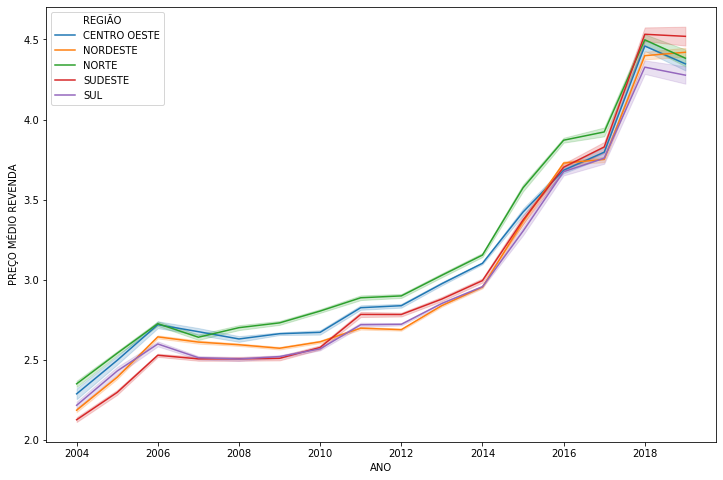

In [97]:
plt.figure(figsize=(12,8))
sns.lineplot(x='ANO',y='PREÇO MÉDIO REVENDA', hue='REGIÃO',data=df_gasolina)